In [7]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

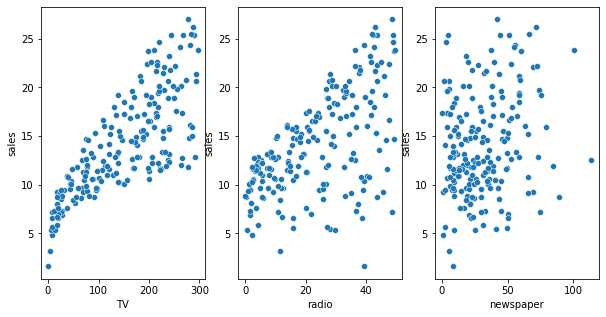

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.scatterplot(x= 'TV', y = 'sales', data = data)

plt.subplot(1,3,2)
sns.scatterplot(x= 'radio', y = 'sales', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'newspaper', y = 'sales', data = data)

plt.show()



In [23]:
x = data[['TV']]

In [24]:
y = data.sales

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lg = LinearRegression()

In [27]:
lg.fit(x,y)

LinearRegression()

In [30]:
print(lg.intercept_)

7.032593549127694


In [31]:
print(lg.coef_)

[0.04753664]


In [34]:
x_new = pd.DataFrame({'TV': [50]})

In [35]:
x_new.head()

,TV
0,50


In [36]:
lg.predict(x_new)

array([9.40942557])

In [39]:
x_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})

In [41]:
preds = lg.predict(x_new)

In [42]:
preds

array([ 7.0658692 , 21.12245377])

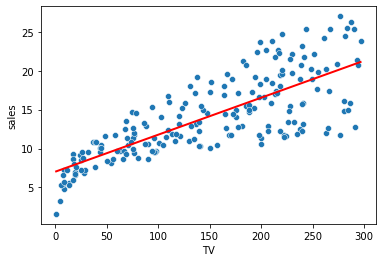

In [49]:
sns.scatterplot(x= 'TV', y = "sales", data = data)

plt.plot(x_new,preds,linewidth=2, c = 'red')
plt.show()

In [50]:
import statsmodels.formula.api as smf

In [54]:
lm = smf.ols(formula='sales~TV', data=data).fit()

In [55]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle
%matplotlib inline


In [47]:
from pandas_profiling import ProfileReport

In [48]:
df = pd.read_csv('Advertising.csv')

In [49]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [50]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [51]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [52]:
pf = ProfileReport(df)

In [53]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
pf.to_file('file.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
x = df[['TV']]

In [8]:
x1 = df[['TV', 'newspaper']]

In [33]:
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [9]:
x1

,TV,newspaper
0,230.1,69.2
1,44.5,45.1
2,17.2,69.3
3,151.5,58.5
4,180.8,58.4
...,...,...
195,38.2,13.8
196,94.2,8.1
197,177.0,6.4
198,283.6,66.2


In [10]:
y = df.sales

In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr2 = LinearRegression()

In [39]:
lr.fit(x,y)

LinearRegression()

In [15]:
lr2.fit(x1,y)

LinearRegression()

In [40]:
lr.intercept_

7.032593549127694

In [16]:
lr2.coef_

array([0.04690121, 0.04421942])

In [17]:
lr2.intercept_

5.774947967911633

In [41]:
lr.coef_

array([0.04753664])

In [42]:
file = 'linear_reg.sav'

In [44]:
pickle.dump(lr,open(file,'wb'))

In [47]:
lr.predict([[9]])

array([7.46042331])

In [48]:
l = [2,35,24,8,63,48]

In [50]:
for i in l:
    print(lr.predict([[i]]))

[7.12766683]
[8.69637596]
[8.17347292]
[7.41288667]
[10.0274019]
[9.31435229]


In [51]:
import pandas as pd

In [52]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [53]:
import seaborn as sns

In [54]:
import pickle

In [18]:
 import statsmodels.formula.api as smf

In [39]:
lm1 = smf.ols(formula='sales~TV+radio+newspaper', data=df).fit()

In [40]:
lm1.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [41]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        12:42:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
lm2 = smf.ols(formula='sales~TV', data=df).fit()

In [43]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        12:42:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm3 = smf.ols(formula='sales~TV+radio', data=df).fit()

In [45]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           4.83e-98
Time:                        12:42:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear regression, lasso and ridge 

In [2]:
from sklearn.datasets import load_boston

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = load_boston()

In [8]:
type(df)

sklearn.utils.Bunch

In [9]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [13]:
data = pd.DataFrame(df.data)

In [14]:
data.columns = df.feature_names

In [15]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
data['Price'] = df.target

In [19]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [27]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [28]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
from sklearn.linear_model import LinearRegression

In [111]:
lir = LinearRegression()
lir.fit(x_train,y_train)

LinearRegression()

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [91]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lir, x_train,y_train, scoring='neg_mean_squared_error', cv = 5)

In [92]:
print(mse)

[-33.75185215 -21.4641199  -27.97099777 -17.7140812  -25.03832267]


In [93]:
mean_mse = np.mean(mse)

In [94]:
mean_mse

-25.187874739284993

In [43]:
# Ridge regression 

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

In [73]:
para = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,25,30,35,40,50,100]}

In [84]:
ridge_regessor = GridSearchCV(ridge,para, scoring='neg_mean_squared_error', cv = 15)

In [95]:
ridge_regessor.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 25, 30, 35, 40, 50, 100]},
             scoring='neg_mean_squared_error')

In [96]:
ridge_regessor.best_params_

{'alpha': 0.001}

In [97]:
ridge_regessor.best_score_

-25.795689120943234

In [78]:
# lasso

In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-3,1,5,10,20,25,30,35,45,40,50,60,100]}


In [98]:
lasso_regressor = GridSearchCV(lasso,param, scoring='neg_mean_squared_error', cv = 10)
lasso_regressor.fit(x_train,y_train)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2999.8656208014568, tolerance: 2.7116020131147542
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3125.9026528337213, tolerance: 2.5569594885245897
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3406.6908166476314, tolerance: 2.8039389377049178
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 1, 5, 10, 20, 25,
                                   30, 35, 45, 40, 50, 60, 100]},
             scoring='neg_mean_squared_error')

In [99]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-25.47309457283324


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [101]:
y_pred = lasso_regressor.predict(x_test)

In [102]:
from sklearn.metrics import r2_score

In [104]:
r = r2_score(y_pred,y_test)

In [105]:
r

0.6709558959121944

In [106]:
y_pred = ridge_regessor.predict(x_test)

In [107]:
r2_score(y_pred,y_test)

0.6709477491609515

In [108]:
y_pred = lasso_regressor.predict(x_test)

In [109]:
r2_score(y_pred,y_test)

0.6709558959121944

In [112]:
y_pred = lir.predict(x_test)

In [113]:
r2_score(y_pred,y_test)

0.6709558976744411

In [115]:
# Logistic regression


In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
from sklearn.datasets import load_breast_cancer

In [119]:
df = load_breast_cancer()

In [120]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [123]:
cancerdata = pd.DataFrame(df.data)

In [124]:
cancerdata.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
cancerdata.columns = df.feature_names

In [126]:
cancerdata.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
cancerdata.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [128]:
cancerdata['Target'] = df.target

In [130]:
x= cancerdata.iloc[:,:-1]

In [131]:
y = cancerdata.iloc[:,-1]

In [132]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [134]:
cancerdata['Target'].value_counts()

1    357
0    212
Name: Target, dtype: int64

In [135]:
from sklearn.model_selection import  train_test_split

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [152]:
params = [{'C':[1,5,10]},{'max_iter':[100,150]}]

In [153]:
model1 = LogisticRegression(C= 100, max_iter=100)

In [154]:
model = GridSearchCV(model1,param_grid=params,cv=5, scoring='f1')

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [159]:
model.best_params_

{'max_iter': 150}

In [160]:
model.best_score_

0.9577028891650476

In [161]:
y_pred = model.predict(x_test)

In [165]:
from sklearn.metrics import classification_report

In [167]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.98      0.98      0.98       120

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [168]:
from sklearn.metrics import confusion_matrix

In [172]:
confusion_matrix(y_test,y_pred)

array([[ 65,   2],
       [  3, 118]], dtype=int64)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(y_pred,y_test)

0.973404255319149

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle

In [4]:
data = pd.read_csv('Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [22]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

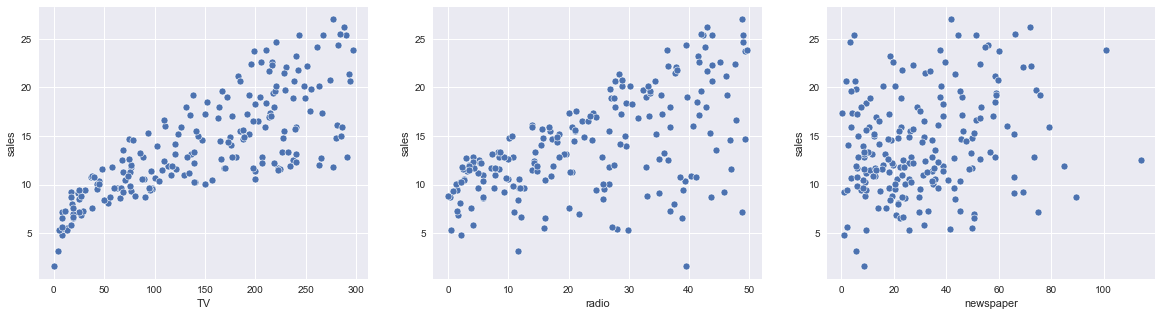

In [31]:
plt.figure(figsize=(20,5))

plt.style.use('seaborn')

plt.subplot(1,3,1)
sns.scatterplot('TV','sales', data=data)

plt.subplot(1,3,2)
sns.scatterplot('radio', 'sales', data=data)

plt.subplot(1,3,3)
sns.scatterplot('newspaper', 'sales', data=data)

In [42]:
x = data[['TV']]

In [43]:
y = data.sales

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lir = LinearRegression()

In [46]:
lir.fit(x,y)

LinearRegression()

In [49]:
print(lir.coef_)

[0.04753664]


In [50]:
print(lir.intercept_)

7.032593549127694


In [51]:
# ridge and lasso regression implementaion

In [53]:
from sklearn.datasets import load_boston

In [56]:
df = load_boston()

In [57]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
dataset = pd.DataFrame(df.data)

In [63]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
dataset.columns = df.feature_names

In [66]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [70]:
df.target.shape

(506,)

In [72]:
dataset['price'] = df.target

In [75]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [79]:
x = dataset.iloc[:,:-1]

In [82]:
y = dataset.iloc[:,-1]

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lir = LinearRegression()

In [85]:
from sklearn.model_selection import cross_val_score

In [88]:
mse  = cross_val_score(lir,x,y,scoring='neg_mean_squared_error', cv = 5)

In [91]:
mean_mse = np.mean(mse)

In [92]:
print(mean_mse)

-37.13180746769902


In [93]:
# Ridge

In [94]:
from sklearn.linear_model import Ridge

In [95]:
ridge = Ridge()

In [98]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100]}

In [100]:
grid_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv = 5)

In [101]:
grid_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [102]:
grid_regressor.best_params_

{'alpha': 100}

In [103]:
grid_regressor.best_score_

-29.905701947540344

In [104]:
from sklearn.linear_model import Lasso

In [105]:
la = Lasso()

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
para = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [109]:
lasso_regressor = GridSearchCV(la,para,scoring='neg_mean_squared_error', cv = 5)

In [111]:
lasso_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [112]:
lasso_regressor.best_params_

{'alpha': 1}

In [113]:
lasso_regressor.best_score_

-35.53158022069484

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [117]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [120]:
y_pred_ridge = grid_regressor.predict(x_test)

In [121]:
import seaborn as sns

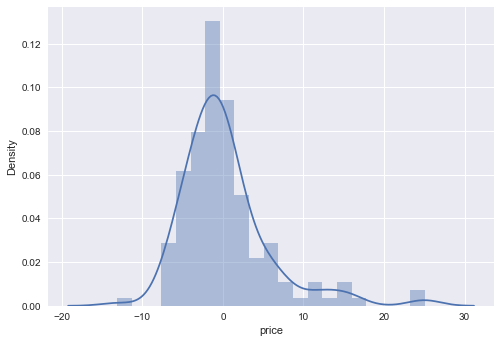

In [125]:
sns.distplot(y_test-y_pred_lasso)
plt.show()

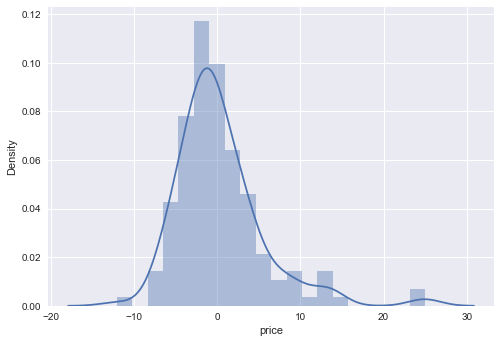

In [127]:
sns.distplot(y_test-y_pred_ridge)
plt.show()

In [128]:
# maltiple linear regression 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
data  = pd.read_csv('50_Startups.csv')

In [135]:
x = data.iloc[:,:-1]

In [139]:
 y = data.iloc[:,-1]

In [140]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [144]:
states = pd.get_dummies(x['State'], drop_first=True)

In [145]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [147]:
x = x.drop('State', axis=1)

In [152]:
x = pd.concat([x,states],axis = 1)

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lir = LinearRegression()

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [157]:
lir.fit(x_train,y_train)

LinearRegression()

In [158]:
y_pred = lir.predict(x_test)

In [159]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [160]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [161]:
from sklearn.metrics import r2_score

In [163]:
r_score = r2_score(y_pred,y_test)

In [165]:
print(r_score)

0.929374920931811


In [1]:
# Linear.ridge,and lasso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

In [4]:
type(df)

sklearn.utils.Bunch

In [5]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
dataset = pd.DataFrame(df.data)

In [9]:
dataset.columns = df.feature_names

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
dataset['Price']=df.target

In [14]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
x = dataset.iloc[:,:-1]

In [21]:
y = dataset.iloc[:,-1]

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
lr.fit(x,y)

LinearRegression()

In [28]:
score = cross_val_score(lr,x,y,scoring='neg_mean_squared_error', cv = 5)

In [31]:
score_mean = np.mean(score)

In [33]:
print(score_mean)

-37.13180746769902


In [57]:
from sklearn.linear_model import Ridge

In [58]:
ridge = Ridge()

In [59]:
params = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,15,20,30,40,45,50,55,100]}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_regessor = GridSearchCV(ridge,params,scoring='neg_mean_squared_error', cv = 5)

In [62]:
grid_regessor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 15, 20, 30, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [65]:
print(grid_regessor.best_params_)

{'alpha': 100}


In [66]:
print(grid_regessor.best_score_)

-29.905701947540344


In [67]:
from sklearn.linear_model import Lasso

In [77]:
paramsss = {'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1,10,15,20,30,40,45,50,55,100,200,300]} 

In [78]:
lasso = Lasso()

In [79]:
lasso_regressor = GridSearchCV(lasso,paramsss,scoring='neg_mean_squared_error', cv = 5)

In [80]:
lasso_regressor.fit(x,y)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4488.820689382209, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4111.608200506886, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4122.909432662281, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 10, 15,
                                   20, 30, 40, 45, 50, 55, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [81]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [82]:
print(lasso_regressor.best_score_)

-35.53158022069484


In [83]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [87]:
score1 = cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error', cv = 5)

In [90]:
new_score_mean = np.mean(score1)

In [91]:
print(new_score_mean)

-25.187874739284993


In [92]:
grid_regessor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 15, 20, 30, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [93]:
grid_regessor.best_params_

{'alpha': 0.01}

In [94]:
grid_regessor.best_score_

-25.186899367386978

In [95]:
lasso_regressor.fit(x_train,y_train)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2356.8070948260124, tolerance: 2.2835709077490773
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2949.290060402971, tolerance: 2.4934183837638377
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2580.7958975822403, tolerance: 2.1595952398523988
  model = cd_fast.enet_coordinate_descent(
C:\Users\skme2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 10, 15,
                                   20, 30, 40, 45, 50, 55, 100, 200, 300]},
             scoring='neg_mean_squared_error')

In [96]:
lasso_regressor.best_params_

{'alpha': 1e-15}

In [97]:
lasso_regressor.best_score_

-25.187874739285025

In [98]:
y_pred = lasso_regressor.predict(x_test)

In [99]:
y_pred


array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [100]:
from sklearn.metrics import r2_score

In [102]:
r2_score = r2_score(y_test,y_pred)

In [104]:
print(r2_score)

0.7261570836552473
